In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 200)
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("../data/processed/lending_club_subset.csv")

DATA ANALYSIS

In [3]:
df.shape

(200000, 152)

In [4]:
cols = df.columns.tolist()
cols

['Unnamed: 0',
 'id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual

In [5]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,264926,50587585,NaN,10000.0,10000.0,10000.0,36 months,13.33,338.54,C,C3,Service Adviser,8 years,RENT,36000.0,Not Verified,2015-05-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,557xx,MN,14.47,0.0,Dec-1997,665.0,669.0,1.0,NaN,NaN,8.0,0.0,9392.0,74.5,12.0,f,0.0,0.0,11980.850293,11980.85,10000.0,1980.85,0.0,0.0,0.0,Aug-2017,3249.63,NaN,Mar-2019,754.0,750.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,17515.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12600.0,NaN,NaN,NaN,4.0,2189.0,1237.0,80.7,0.0,0.0,48.0,209.0,10.0,10.0,0.0,10.0,NaN,6.0,NaN,0.0,4.0,7.0,4.0,5.0,2.0,7.0,10.0,7.0,8.0,0.0,0.0,0.0,3.0,100.0,75.0,0.0,0.0,21999.0,17515.0,6400.0,9399.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,857134,136642719,NaN,16000.0,16000.0,16000.0,36 months,13.56,543.43,C,C1,Travel Agent,10+ years,RENT,49000.0,Source Verified,2018-07-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,067xx,CT,35.17,0.0,Oct-1996,685.0,689.0,0.0,NaN,NaN,10.0,0.0,20159.0,60.9,23.0,f,0.0,0.0,16291.372089,16291.37,16000.0,291.37,0.0,0.0,0.0,Oct-2018,216.56,NaN,Mar-2019,679.0,675.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,25834.0,0.0,1.0,0.0,1.0,16.0,5675.0,54.0,0.0,1.0,6075.0,59.0,33100.0,0.0,0.0,1.0,2.0,2583.0,2979.0,87.1,0.0,0.0,143.0,261.0,23.0,16.0,0.0,28.0,NaN,0.0,NaN,0.0,7.0,8.0,7.0,15.0,5.0,9.0,18.0,8.0,10.0,0.0,0.0,0.0,0.0,100.0,71.4,0.0,0.0,43712.0,25834.0,23

In [6]:
df.tail()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
199995,658698,83254087,NaN,13000.0,13000.0,13000.0,36 months,11.49,428.63,B,B5,Machine shop supervisor,9 years,RENT,102000.0,Source Verified,2016-06-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,741xx,OK,22.18,0.0,Jan-2005,700.0,704.0,0.0,75.0,NaN,9.0,0.0,13552.0,86.3,14.0,w,0.0,0.0,11607.570000,11607.57,9313.72,2250.99,42.86,0.0,0.000,Oct-2018,428.63,NaN,Mar-2019,539.0,535.0,0.0,75.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,46388.0,0.0,4.0,0.0,2.0,14.0,32836.0,50.0,0.0,1.0,6443.0,57.0,15700.0,1.0,3.0,1.0,3.0,5154.0,1986.0,86.9,0.0,0.0,105.0,137.0,23.0,14.0,0.0,26.0,75.0,12.0,75.0,2.0,3.0,4.0,4.0,7.0,6.0,5.0,8.0,4.0,9.0,0.0,0.0,0.0,0.0,85.7,75.0,0.0,0.0,81497.0,46388.0,15200.0,65797.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
199996,742498,75974376,NaN,2400.0,2400.0,2400.0,36 months,12.99,80.86,C,C2,teacher,10+ years,MORTGAGE,44000.0,Not Verified,2016-04-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,284xx,NC,26.95,0.0,Jun-1994,730.0,734.0,0.0,NaN,NaN,11.0,0.0,8969.0,54.4,30.0,f,0.0,0.0,2647.001179,2647.00,2400.00,247.00,0.00,0.0,0.000,Feb-2017,1920.99,NaN,Mar-2019,724.0,720.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,181969.0,1.0,6.0,1.0,3.0,6.0,51697.0,87.0,0.0,1.0,2025.0,80.0,16500.0,0.0,0.0,0.0,4.0,16543.0,6281.0,28.6,0.0,0.0,231.0,261.0,18.0,6.0,5.0,32.0,NaN,13.0,NaN,0.0,2.0,4.0,2.0,4.0,16.0,4.0,9.0,4.0,11.0,0.0,0.0,0.0,1.0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 152 entries, Unnamed: 0 to settlement_term
dtypes: float64(114), int64(2), object(36)
memory usage: 231.9+ MB


In [8]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,next_pymnt_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,2.000000e+05,2.000000e+05,0.0,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,199923.000000,200000.000000,200000.000000,200000.000000,200000.000000,102728.000000,37798.000000,200000.000000,200000.000000,2.000000e+05,199880.000000,200000.000000,200000.0,200000.0,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,0.0,200000.000000,200000.000000,200000.000000,57799.000000,200000.0,5690.000000,5689.000000,200000.000000,200000.000000,2.000000e+05,120136.000000,120136.000000,120136.000000,120136.000000,116888.000000,120136.000000,103998.000000,120136.000000,120136.000000,120136.000000,120119.000000,2.000000e+05,120136.000000,120136.000000,120136.000000,200000.000000,199997.000000,197675.000000,197552.000000,200000.000000,200000.000000,194296.000000,200000.000000,200000.000000,200000.000000,200000.000000,197805.000000,49968.000000,180745.000000,70671.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,190600.000000,200000.000000,200000.000000,200000.000000,200000.000000,197606.000000,200000.000000,200000.000000,2.000000e+05,2.000000e+05,200000.000000,200000.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,3967.000000,4040.000000,4040.000000,4040.000000,4040.000000,1445.000000,1181.0,1181.000000,1181.0,1181.000000,765.000000,1181.000000,1181.000000,5953.000000,5953.000000,5953.000000
mean,8.540259e+05,7.822240e+07,NaN,14533.486500,14533.486500,14527.856351,12.968048,441.516312,7.787237e+04,18.851068,0.338825,695.995750,699.995915,0.586605,34.276809,68.844225,11.808375,0.244050,1.629252e+04,49.735367,24.945905,0.0,0.0,14352.400448,14346.841453,12030.850001,2063.598123,1.816540e+00,256.135779,45.058349,5980.226762,NaN,676.125570,657.607375,0.021240,44.232115,1.0,116921.027540,18.785920,0.005690,267.388175,1.419005e+05,1.051317,2.792269,0.776620,1.744406,19.497023,35940.899364,71.435037,1.416595,3.003213,5516.315201,58.238688,3.376791e+04,1.088292,1.6

In [9]:
df["loan_status"].value_counts(normalize=True)

loan_status
Fully Paid     0.78583
Charged Off    0.21417
Name: proportion, dtype: float64

In [10]:
df['emp_title'].nunique()

64834

In [11]:
missing_pct = df.isna().mean().sort_values(ascending=False)
missing_pct.head(60)

member_id                                     1.000000
next_pymnt_d                                  1.000000
desc                                          0.999975
orig_projected_additional_accrued_interest    0.996175
hardship_payoff_balance_amount                0.994095
hardship_last_payment_amount                  0.994095
hardship_reason                               0.994095
hardship_type                                 0.994095
hardship_status                               0.994095
hardship_amount                               0.994095
deferral_term                                 0.994095
hardship_end_date                             0.994095
hardship_dpd                                  0.994095
hardship_loan_status                          0.994095
hardship_length                               0.994095
payment_plan_start_date                       0.994095
hardship_start_date                           0.994095
sec_app_mths_since_last_major_derog           0.992775
sec_app_re

In [12]:
df.duplicated().sum()

np.int64(0)

Visualization

<Axes: xlabel='loan_status', ylabel='count'>

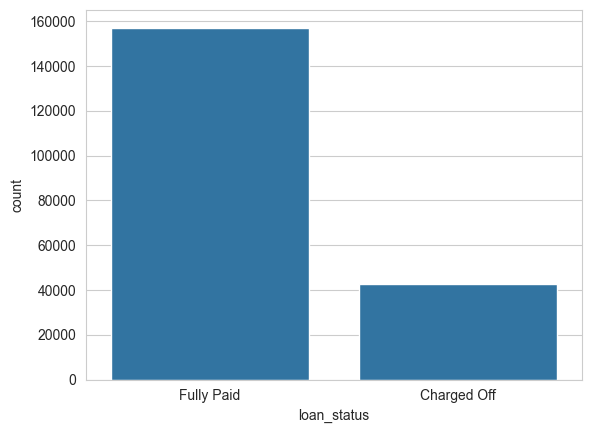

In [13]:
sns.countplot(data=df, x='loan_status')

<Axes: xlabel='issue_d', ylabel='count'>

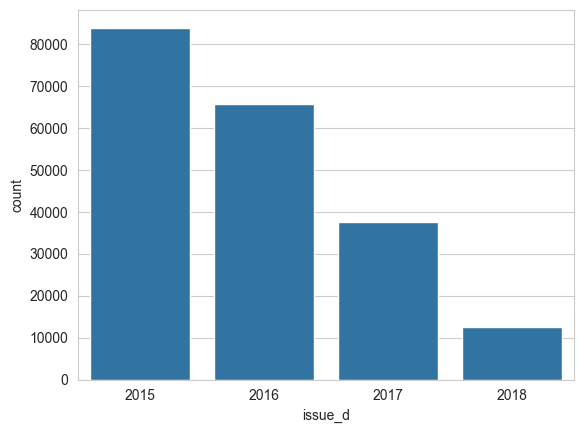

In [14]:
sns.countplot(x=pd.to_datetime(df['issue_d']).dt.year)

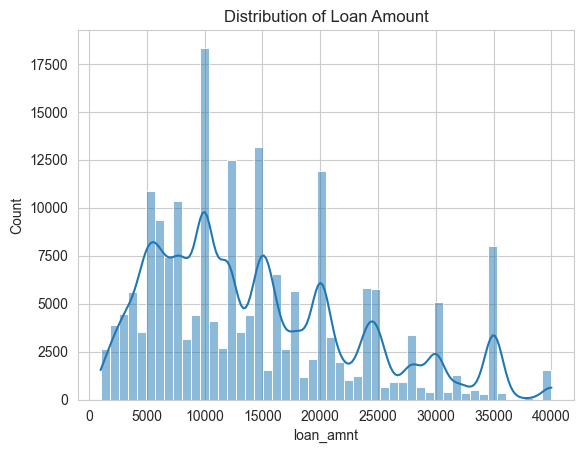

In [15]:
sns.histplot(df["loan_amnt"], bins=50, kde=True)
plt.title("Distribution of Loan Amount")
plt.show()

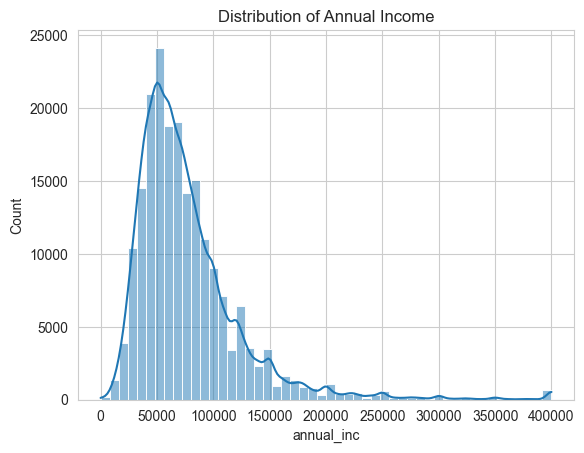

In [16]:
sns.histplot(df["annual_inc"].clip(upper=df['annual_inc'].quantile(.997)), bins=50, kde=True)
plt.title("Distribution of Annual Income")
plt.show()

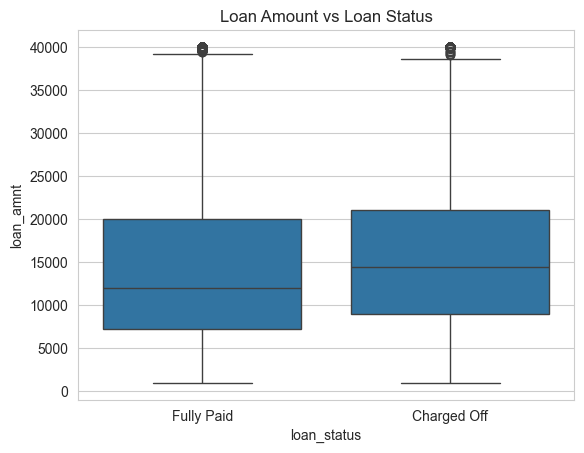

In [17]:
sns.boxplot(x="loan_status", y="loan_amnt", data=df)
plt.title("Loan Amount vs Loan Status")
plt.show()

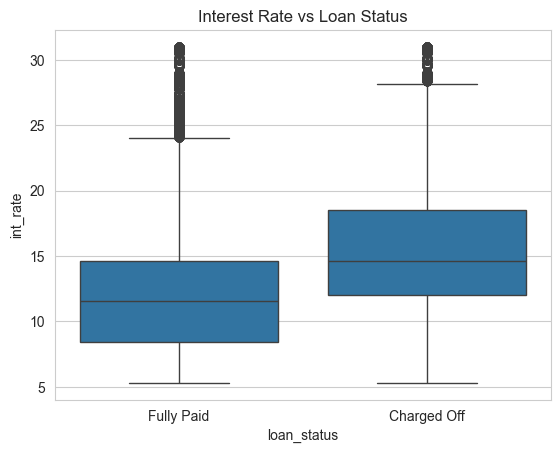

In [18]:
sns.boxplot(x="loan_status", y="int_rate", data=df)
plt.title("Interest Rate vs Loan Status")
plt.show()

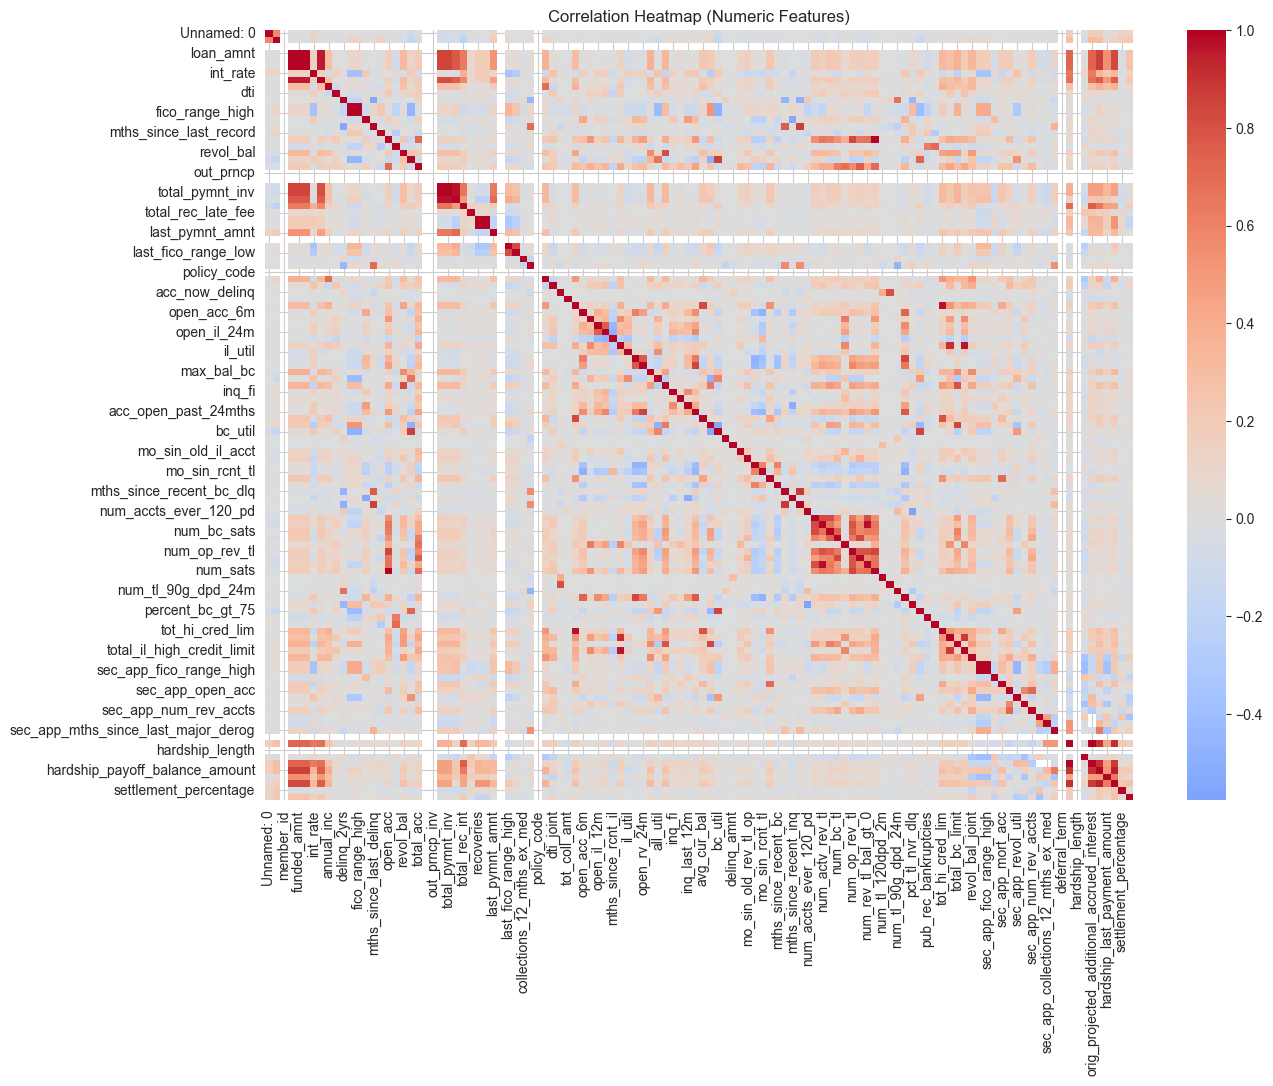

In [19]:
numeric_df = df.select_dtypes(include="number")
corr = numeric_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()